In [220]:
import pandas as pd   
import requests   
from bs4 import BeautifulSoup 
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

In [221]:
url = 'https://www.flip.kz/catalog?subsection=44&filter-show=1'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

In [222]:
book_title = []
year = []
review_count=[]
book_cover=[]
publisher = []
price = []

In [223]:
book_desc= soup.findAll('div', attrs= {'class': 'placeholder'})

In [224]:
for book in book_desc:
    name = book.div.find('a',class_='title').text
    book_title.append(name)
    
    num_of_com = book.find('div',class_='comment').text.replace('Читать все отзывы...','')  if book.find('div',class_='comment') else '^^^^^^'
    review_count.append(num_of_com)
    
    price_book=book.div.find('div',class_='price').text if book.div.find('div',class_='price') else 'Coming Soon'
    price.append(price_book)
    
    add_info=book.find('div',class_='add-info').text.split(',')
    
    book_cover.append(add_info[0])
    year.append(add_info[1].strip()[:4])
    publisher.append(add_info[1].strip()[4:])

In [225]:
flip= pd.DataFrame({'Book Title':book_title, 'Published Year': year,'No of Reviews':review_count,'Book Cover': book_cover, 'Publisher': publisher, 'Price': price})


In [226]:
flip.to_csv('flip1.csv')

In [227]:
df=pd.read_csv('flip.csv')
df

,Book Title,Published Year,No of Reviews,Book Cover,Publisher,Price,Genre
0,Девочка с растрепанными волосами,2021,43,твердый переплет,Фолиант,2 025 ₸,Детская художественная литература
1,Гарри Поттер и Философский камень,2014,87,твердый переплет,Махаон,6 990 ₸,Детская художественная литература
2,Қазақ халық ертегілері,2021,17,твердый переплет,Фолиант,3 232 ₸,Детская художественная литература
3,Часодеи. Часовой ключ. Книга 1,2012,33,твердый переплет,Росмэн,4 853 ₸,Детская художественная литература
4,Гарри Поттер и Тайная комната,2022,31,твердый переплет,Махаон,6 398 ₸,Детская художественная литература
...,...,...,...,...,...,...,...
619,Путеводитель для влюблённых в математику,2022,1,твердый переплет,Альпина нон-фикшн,6 417 ₸,Науч-поп
620,Математические трюки для быстрого счета,2022,1,мягкая обложка,Альпина Паблишер,4 144 ₸,Науч-поп
621,Как изобрести все. Создай цивилизацию с нуля,2019,1,твердый переплет,Бомбора,5 719 ₸,Науч-поп
622,Занимательная физика,2018,1,мягкая обложка,АСТ,1 319 ₸,Науч-поп


Which are the books with most occurances in the list?

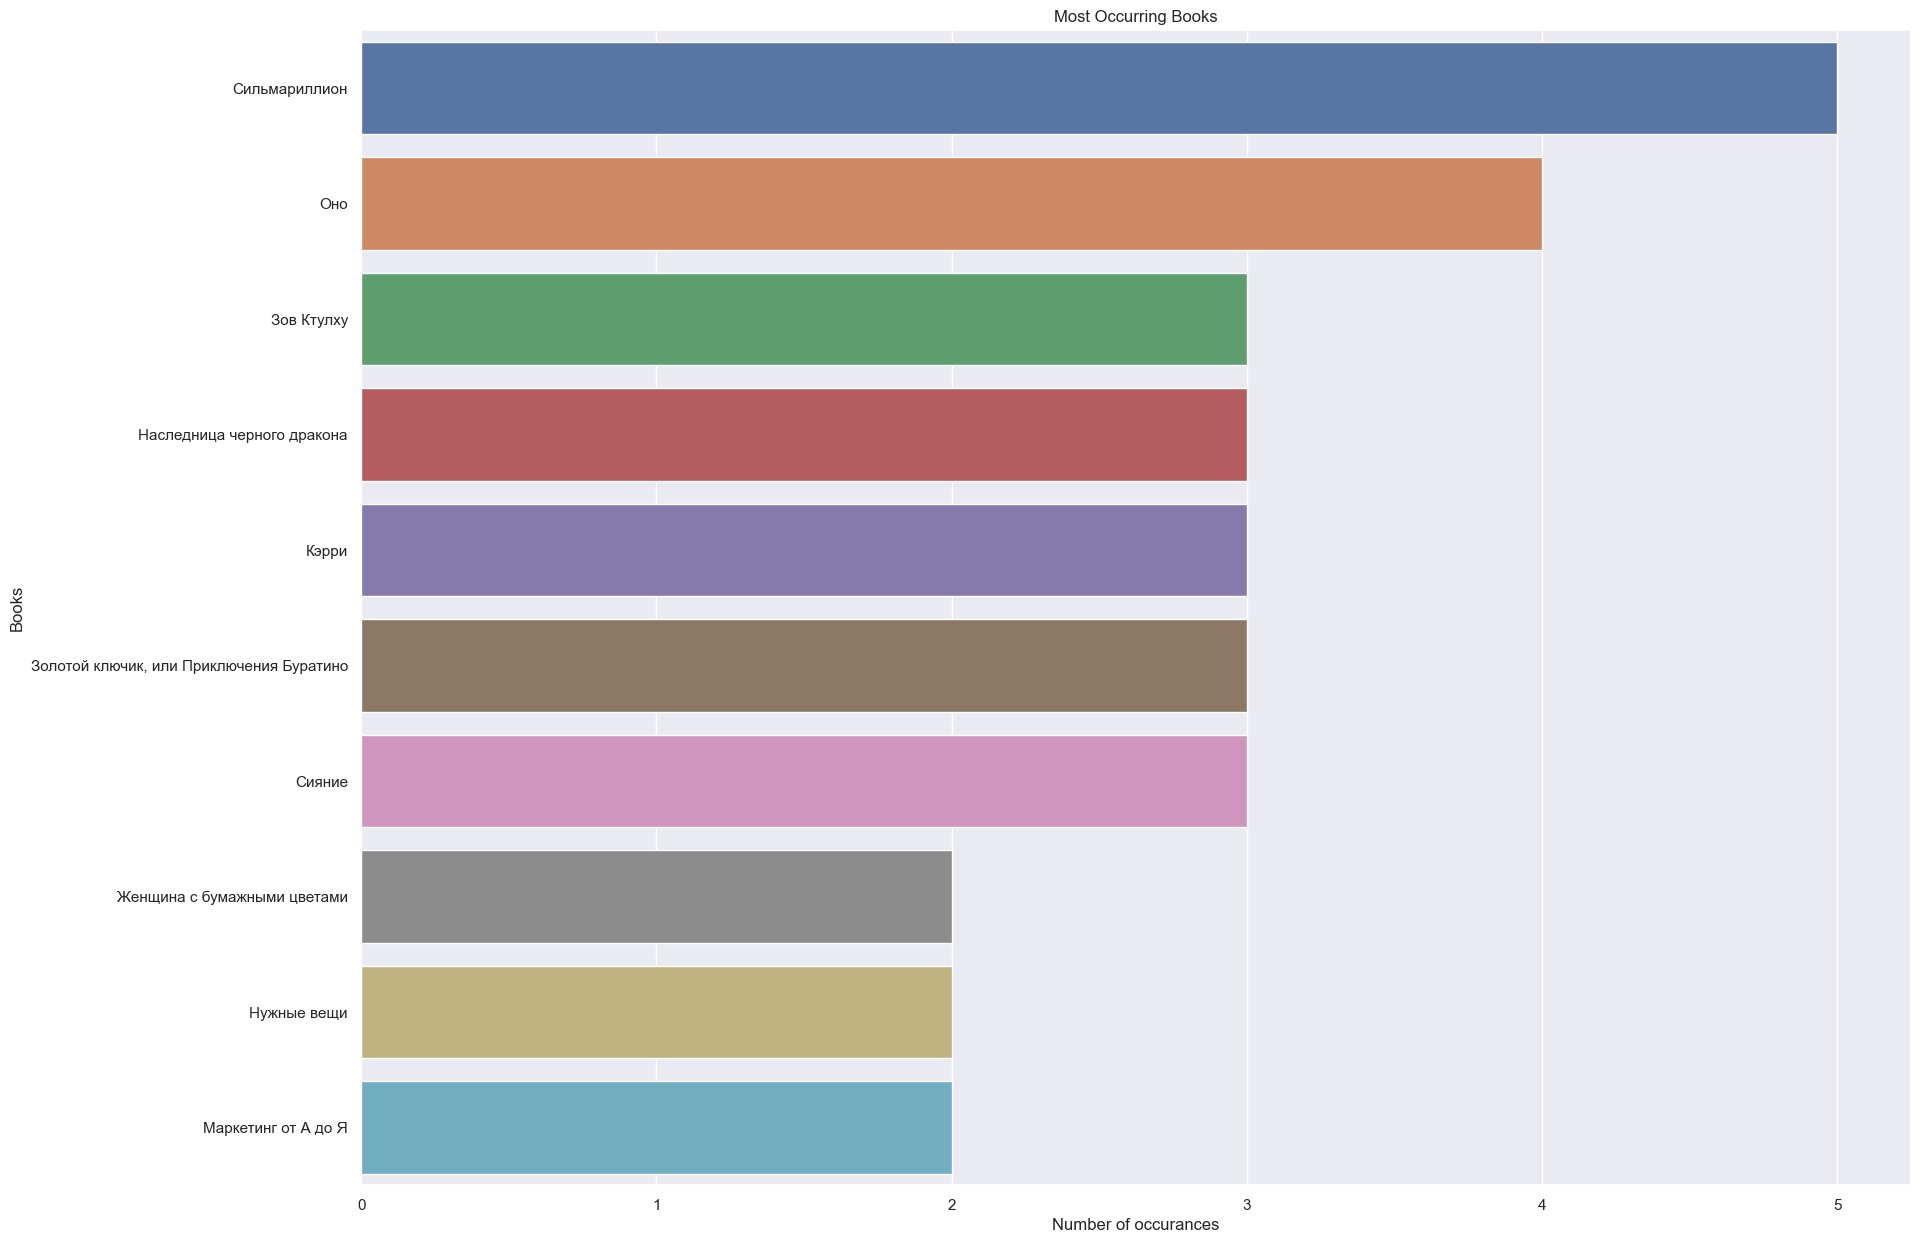

In [228]:
plt.figure(figsize=(20,15))
books = df['Book Title'].value_counts()[:10]
rating = df['No of Reviews'][:20]
sns.barplot(x = books, y = books.index, palette='deep')
plt.title("Most Occurring Books")
plt.xlabel("Number of occurances")
plt.ylabel("Books")
plt.show()

<AxesSubplot: ylabel='Published Year'>

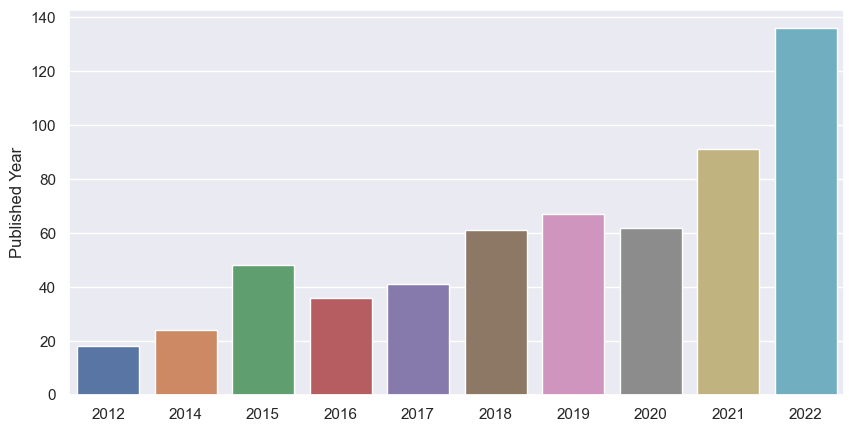

In [250]:
# In which year, highest books published.?
plt.figure(figsize = (10,5))
year = df['Published Year'].value_counts().head(10)
sns.barplot(x=year.index,y=year)

In [251]:
year

2022    136
2021     91
2019     67
2020     62
2018     61
2015     48
2017     41
2016     36
2014     24
2012     18
Name: Published Year, dtype: int64

Text(0, 0.5, 'Number of Books')

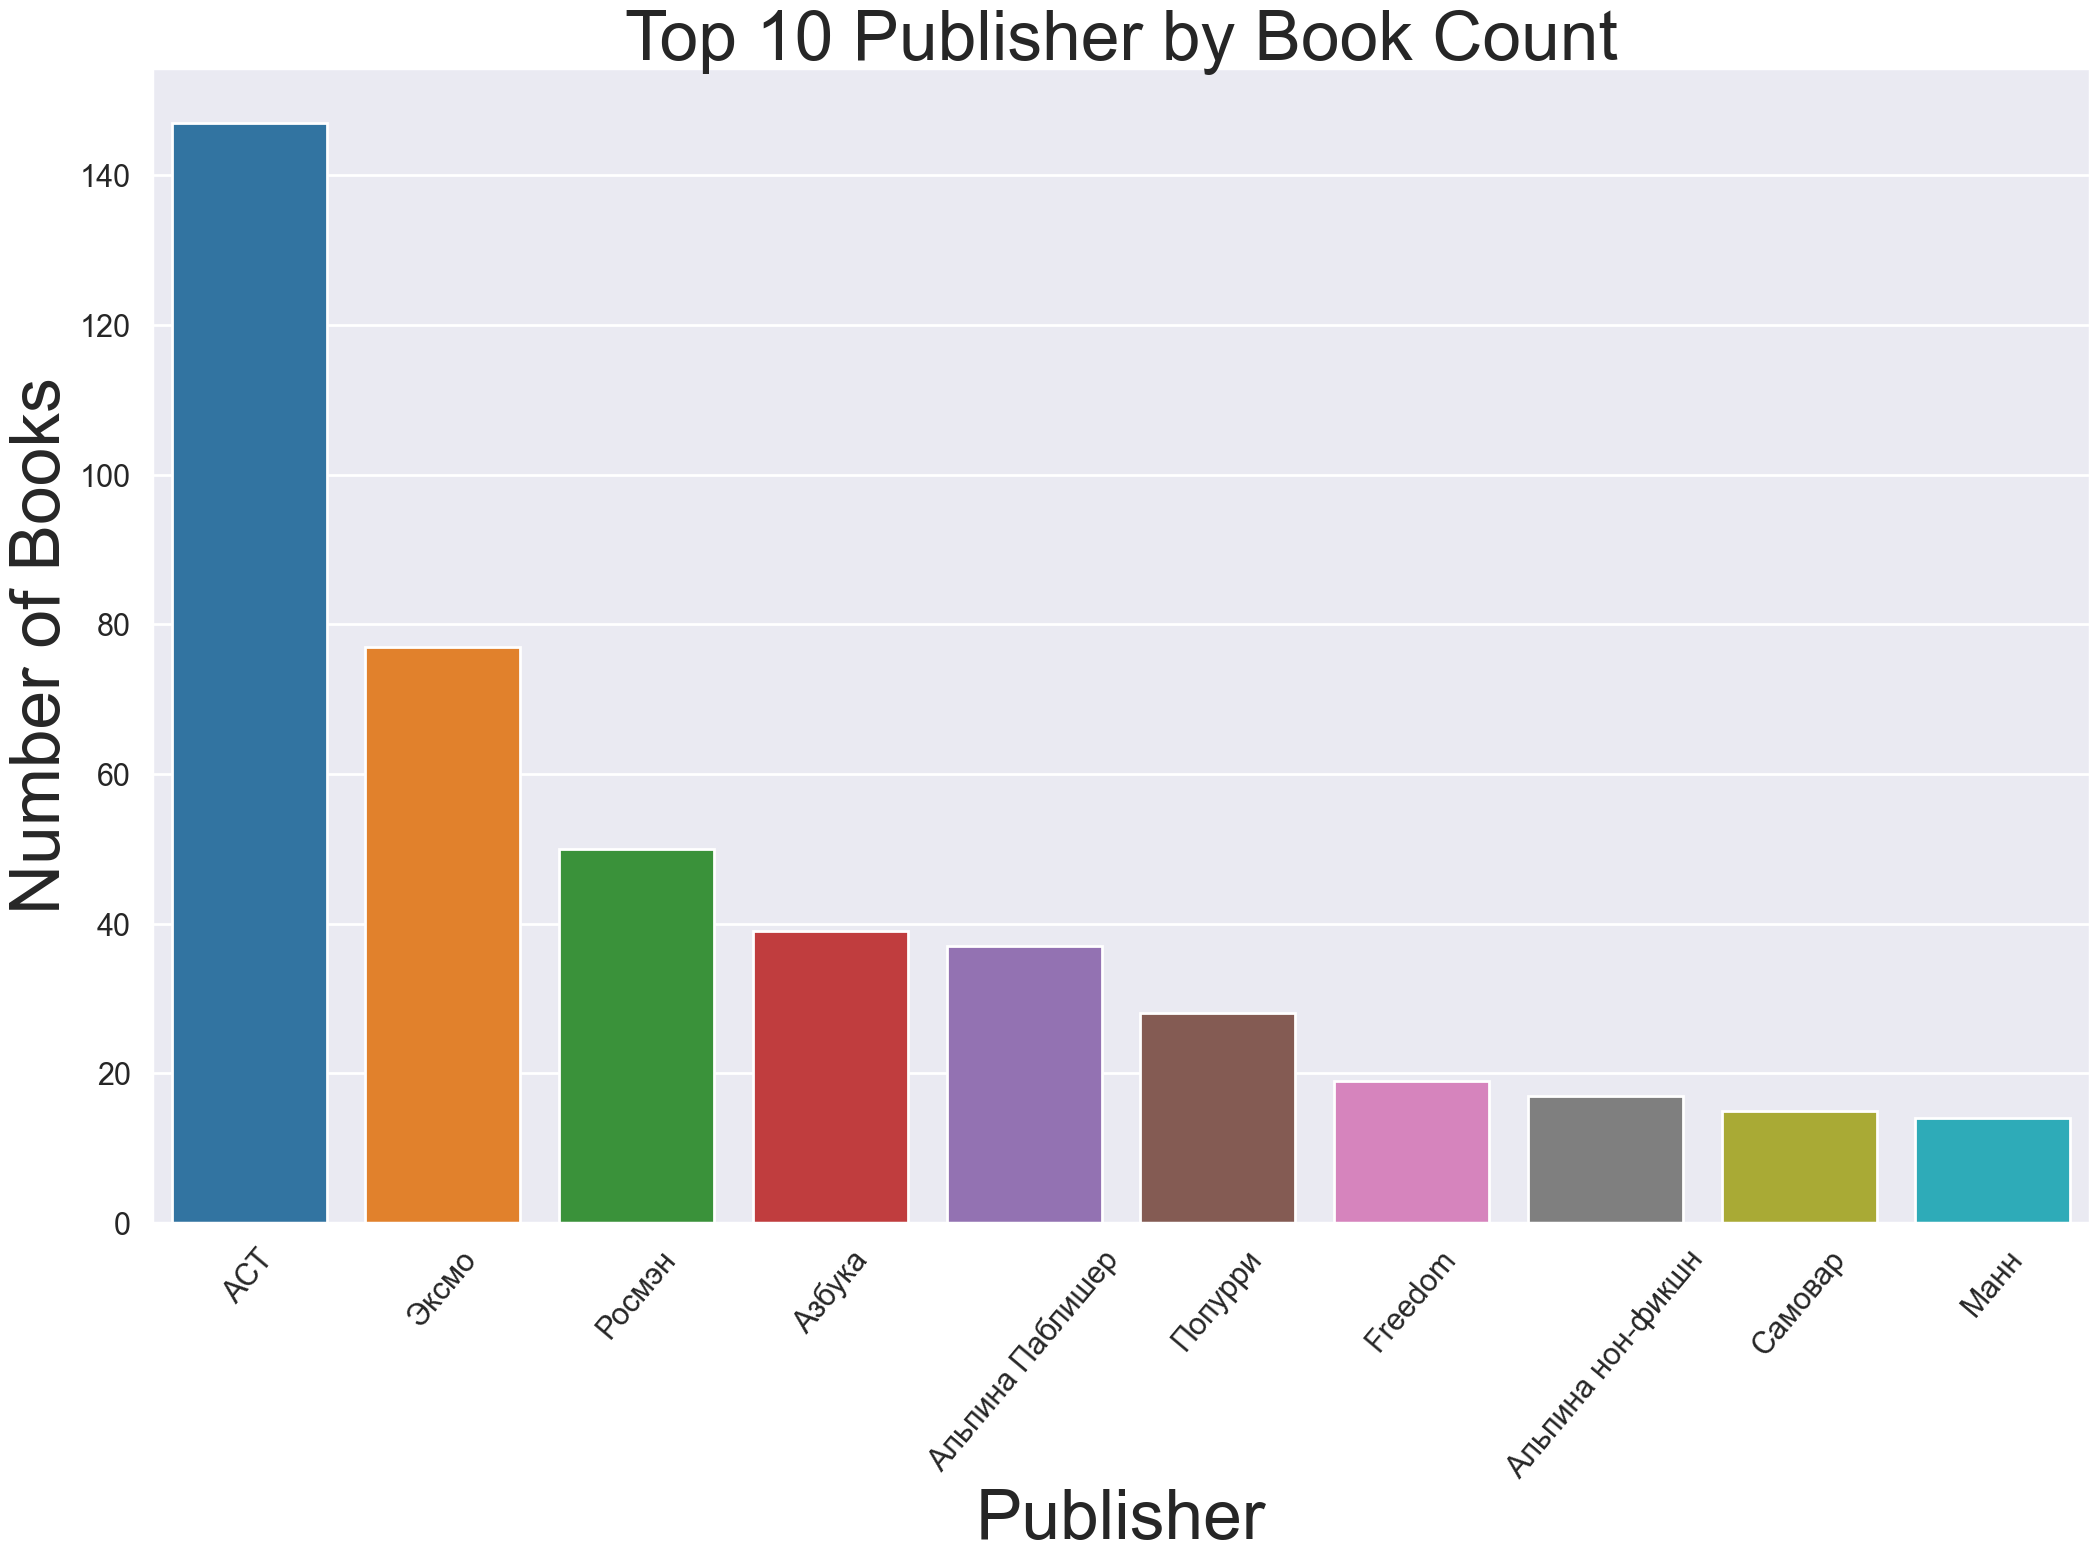

In [230]:
sns.set_context("poster")
most_books = df.groupby('Publisher')['Book Title'].count().reset_index().sort_values('Book Title', ascending=False).head(10).set_index('Publisher', )
plt.figure(figsize=(25,15))
ax = sns.barplot(x = most_books.index, y = most_books['Book Title'], palette='tab10', orient = 'v')
ax.tick_params(axis='x', rotation=50)
ax.set_title("Top 10 Publisher by Book Count", size = 50)
ax.set_xlabel("Publisher", size = 50)
ax.set_ylabel('Number of Books', size = 50)

In [231]:
df['No of Reviews'] = df['No of Reviews'].replace('^^^^^^','0')

In [232]:
df["No of Reviews"] = pd.to_numeric(df["No of Reviews"])

In [233]:
df.dtypes

Book Title        object
Published Year     int64
No of Reviews      int64
Book Cover        object
Publisher         object
Price             object
Genre             object
dtype: object

In [234]:
df.sort_values('No of Reviews',ascending=False)

,Book Title,Published Year,No of Reviews,Book Cover,Publisher,Price,Genre
288,Магия утра,2018,170,твердый переплет,Манн,6 506 ₸,Личная эффективность
290,Тонкое искусство пофигизма,2022,170,мягкая обложка,Альпина Паблишер,4 190 ₸,Личная эффективность
291,Думай и богатей,2022,168,мягкая обложка,Попурри,2 590 ₸,Личная эффективность
226,Александр Пушкин. Сказки,2012,160,твердый переплет,Росмэн,3 112 ₸,Сказки
397,Шестерка воронов,2018,91,твердый переплет,АСТ,4 190 ₸,Фантастика
...,...,...,...,...,...,...,...
547,Крутые бренды должны быть горячими,2020,0,твердый переплет,Бомбора,6 054 ₸,Маркетинг
546,Сильнейшие. Бизнес по правилам Netflix,2020,0,мягкая обложка,Эксмо,2 589 ₸,Маркетинг
107,Колесо Времени. Книга 9. Сердце зимы,2022,0,твердый переплет,Азбука,8 764 ₸,Детская художественная литература
544,Экспертный контент в маркетинге,2022,0,мягкая обложка,Эксмо,3 579 ₸,Маркетинг


In [235]:
most_rated = df.sort_values('No of Reviews', ascending = False).head(10)
plt.figure(figsize=(15,10))
most_rated

,Book Title,Published Year,No of Reviews,Book Cover,Publisher,Price,Genre
288,Магия утра,2018,170,твердый переплет,Манн,6 506 ₸,Личная эффективность
290,Тонкое искусство пофигизма,2022,170,мягкая обложка,Альпина Паблишер,4 190 ₸,Личная эффективность
291,Думай и богатей,2022,168,мягкая обложка,Попурри,2 590 ₸,Личная эффективность
226,Александр Пушкин. Сказки,2012,160,твердый переплет,Росмэн,3 112 ₸,Сказки
397,Шестерка воронов,2018,91,твердый переплет,АСТ,4 190 ₸,Фантастика
1,Гарри Поттер и Философский камень,2014,87,твердый переплет,Махаон,6 990 ₸,Детская художественная литература
507,"Пиши, сокращай. Как создавать сильный текст",2021,85,мягкая обложка,Альпина Паблишер,6 590 ₸,Маркетинг
15,Гарри Поттер. Комплект из 7 книг,2021,81,твердый переплет,Росмэн,42 500 ₸,Детская художественная литература
85,Дом странных детей,2016,78,твердый переплет,Клуб семейного досуга,7 900 ₸,Детская художественная литература
177,Артур Конан Дойл. Полное собрание,2017,78,твердый переплет,Альфа-книга,14 648 ₸,Детектив


<Figure size 1500x1000 with 0 Axes>

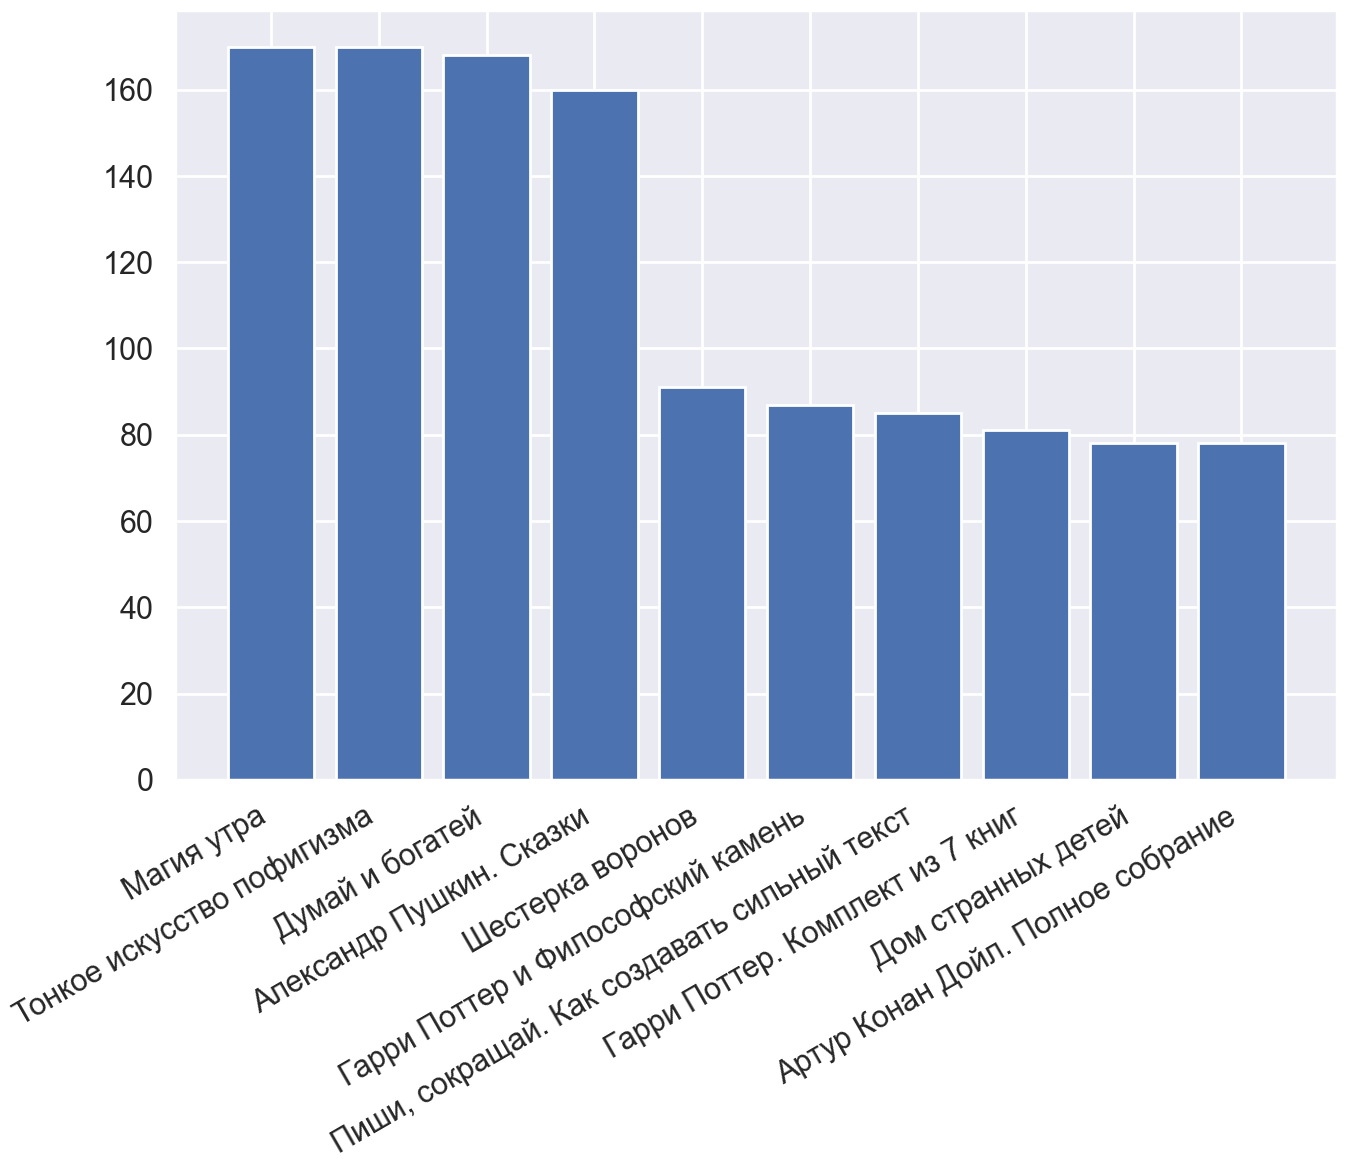

In [236]:
x = most_rated['Book Title']
y = most_rated['No of Reviews']
plt.figure(figsize=(15,10))
plt.xticks(rotation=30, ha='right')
plt.bar(x, y)
plt.show()

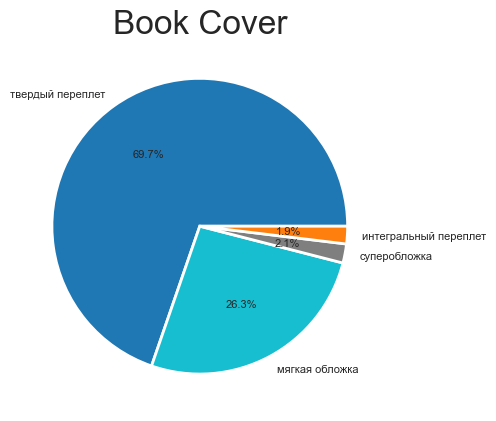

<Figure size 2500x2000 with 0 Axes>

In [237]:

x = df['Book Cover'].value_counts()
labels = df['Book Cover'].unique()
colors = ['tab:blue', 'tab:cyan', 'tab:gray', 'tab:orange', 'tab:red']
fig, ax = plt.subplots()
plt.figure(figsize=(25,20))
ax.pie(x, labels = labels, colors = colors,textprops={'fontsize': 8},autopct='%1.1f%%')
ax.set_title('Book Cover')
plt.show()

In [238]:
df['Book Cover'].unique()

array(['твердый переплет', 'мягкая обложка', 'суперобложка',
       'интегральный переплет'], dtype=object)

In [239]:
df['Price']=df['Price'].str.replace(' ₸','')
#2 025-> 2025

In [240]:
df['Price']=df["Price"].str.replace(' ','')
df['Price']=df['Price'].replace(['₸'], '', regex=True)
df

,Book Title,Published Year,No of Reviews,Book Cover,Publisher,Price,Genre
0,Девочка с растрепанными волосами,2021,43,твердый переплет,Фолиант,2025,Детская художественная литература
1,Гарри Поттер и Философский камень,2014,87,твердый переплет,Махаон,6990,Детская художественная литература
2,Қазақ халық ертегілері,2021,17,твердый переплет,Фолиант,3232,Детская художественная литература
3,Часодеи. Часовой ключ. Книга 1,2012,33,твердый переплет,Росмэн,4853,Детская художественная литература
4,Гарри Поттер и Тайная комната,2022,31,твердый переплет,Махаон,6398,Детская художественная литература
...,...,...,...,...,...,...,...
619,Путеводитель для влюблённых в математику,2022,1,твердый переплет,Альпина нон-фикшн,6417,Науч-поп
620,Математические трюки для быстрого счета,2022,1,мягкая обложка,Альпина Паблишер,4144,Науч-поп
621,Как изобрести все. Создай цивилизацию с нуля,2019,1,твердый переплет,Бомбора,5719,Науч-поп
622,Занимательная физика,2018,1,мягкая обложка,АСТ,1319,Науч-поп


In [241]:
df["Price"] = pd.to_numeric(df["Price"])

Book by Genre

In [242]:
df['Genre'].value_counts()

Детская художественная литература    110
Фантастика                           109
Маркетинг                             62
Детектив                              60
Личная эффективность                  60
Сказки                                59
Науч-поп                              57
Романы                                52
Ужасы                                 46
Искусство                              9
Name: Genre, dtype: int64

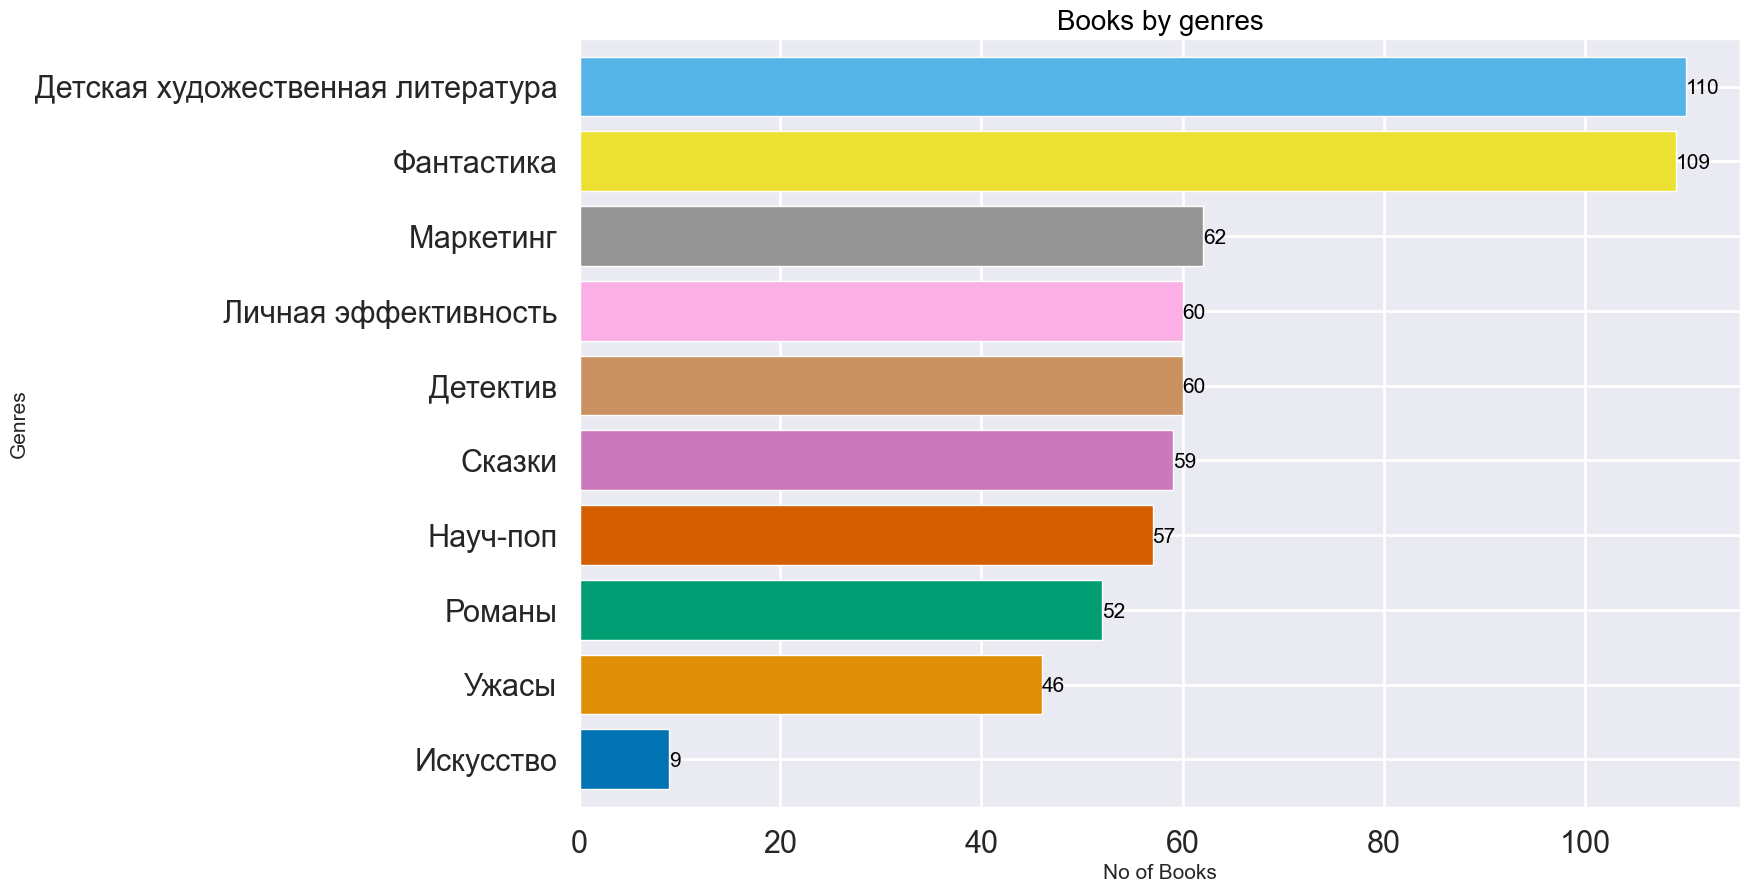

In [243]:
most_popular = df.groupby('Genre')['Book Title'].count().reset_index().sort_values('Book Title',ascending=False).head(10).set_index('Genre')
most_popular
plt.subplots(figsize=(15,10))
sns.set(style="darkgrid")

ax = most_popular['Book Title'].sort_values().plot.barh(width=0.8,color=sns.color_palette('colorblind',12))
ax.set_xlabel("No of Books", fontsize=15)
ax.set_ylabel("Genres", fontsize=15)
ax.set_title("Books by genres",fontsize=20,color='black')

for i in ax.patches:
    ax.text(i.get_width(), i.get_y()+.3,str(round(i.get_width())), fontsize=15, color='black')
plt.show()